INTRODUCTION: 
Many women are interested in diamonds, I am one of them. However only few are aware of the different types, quality and prices of diamonds available. There are lot of factors that make certain diamonds very precious. As I am ignorant towards these factors and qualities, I decided to follow my interest to explore the quality of diamonds. This lead to chose dataset related to diamonds for performing exploratory data analysis. I got this dataset from kaggle, one of the famous websites where one can find various collections of datasets which can be used in data analysis projects. In this notebook, we are going to investigate and summarize the main charectaristics of this diamonds dataset. 

This selected dataset is in CSV (comma seperated file) format.

ATTRIBUTES IN DATASET:
It contains various attributes of diamonds like price in US dollars, diamond weight in carats, quality of diamond cut, color of diamonds, clarity of diamonds, total depth percentage in diamonds, Table (top width of the diamond) and dimensions of diamonds.

FORMATTING THE DATASET:
The selected dataset is found to be clean with no null values. 


The dataset is downloaded and saved in google drive. 

In [0]:
import pandas as pd
from google.colab import drive
#import io  
#uploaded = files.upload()

The selected dataset is saved in google drive. Using the python packages of google colab such as mount, the notebook is given access to google drive. As the selected dataset is csv file, with the help of pandas library, the file is fetched from google drive and stored in a dataframe.

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
%cd ../

/


In [6]:
cd content/gdrive

/content/gdrive


In [7]:
cd My\ Drive

/content/gdrive/My Drive


In [0]:
diamonds = pd.read_csv('diamonds.csv')

In [9]:
len(diamonds)

53940

In [0]:
diamonds.shape

(53940, 11)

The selected diamonds dataset has 53940 instances or records and 11 features available.

In [10]:
diamonds.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

By displaying first 5 records of dataframe, we can see the available features of the selected dataset. We can notice that every column is named in the diamond terminology, which most of the people are unaware. So, for providing better understandability, I chose to rename the columns and also provide the metrics of values for each column. 

Column Renames:

'cut' is renamed to 'Cut_quality' ( as this column represents the quality of Diamond cut).

'color' is renamed to 'Color_quality' as this column represents the quality of colour.

'depth' is renamed to 'Total_depth_percentage' as this column represents the total depth of the diamond in percentages.

'table' is renamed to 'Top_width' as this column represents the width of the diamond top which is called 'table' in diamond terminology.

'price' is renamed to 'Price_dollars' as this column represents the price of diamonds in dollars (US)

'x','y','z' are the dimensions of the diamond corresponding to length, breadth and width of diamonds represented in mm. So they are renamed to 'X_length_mm', Y_width_mm', 'Z_depth_mm' simultaneously.

EXPLANATION OF ATTRIBUTE SCALE USED:

The scale range for describing quality of various factors is confusing though it seems to be how the diamonds are evaluated.

The attribute 'color' has the values ranging from D to J where D is the best which represents colorless quality and J is the worst.

The attribute 'clarity' gives the clarity of a diamond with the values I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF where the order representing l1(Included) as the worst and IF (flawless) as the best.



In [0]:
diamonds.rename(columns = {
    "cut":"Cut_quality",
    "color":"Color_quality",
    "depth":"Total_depth_percentage",
    "table":"Top_width",
    "price": "Price_dollars",
    "x":"length_mm",
    "y":"width_mm",
    "z":"depth_mm"    
},
inplace = True
)

In [53]:
diamonds.head(5)

,Unnamed: 0,carat,Cut_quality,Color_quality,clarity,Total_depth_percentage,Top_width,Price_dollars,length_mm,width_mm,depth_mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I also found that column named 'Unnamed:0' just gives the index of records which is by default provided by the dataframe. So I chose to remove this column from the dataframe to make the data concise and clear.

In [0]:
del diamonds["Unnamed: 0"]

In [55]:
diamonds.isnull().values.any()

False

As isnull() function on diamonds dataframe gives false result, it is confirmed that there are no null values in the dataset. As the data set is complete we can proceed with exploratory data analysis.

In [56]:
diamonds.shape

(53940, 10)

After formating the data and removing unnecessary attributes, the dimensions of the data set is calculated using shape attribute of colab notebook. It gives (53940, 10) which describes number of rows and columns.

In [57]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat                     53940 non-null float64
Cut_quality               53940 non-null object
Color_quality             53940 non-null object
clarity                   53940 non-null object
Total_depth_percentage    53940 non-null float64
Top_width                 53940 non-null float64
Price_dollars             53940 non-null int64
length_mm                 53940 non-null float64
width_mm                  53940 non-null float64
depth_mm                  53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The info() function in google colab notebook gives the information regarding dataset columns.There are 3 categorical attributes(Cut_quality, Color_quality, clarity) which are ranked interms of quality having datatype 'object'. The rest are quantitave attributes. Carat, Total_depth_percentage, Top_width, Length, width and depth of diamonds have datatype float. Price of diamonds is rounded to integer value.

In [58]:
diamonds.head(5)

,carat,Cut_quality,Color_quality,clarity,Total_depth_percentage,Top_width,Price_dollars,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
diamonds.tail(5)

,carat,Cut_quality,Color_quality,clarity,Total_depth_percentage,Top_width,Price_dollars,length_mm,width_mm,depth_mm
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


By having a look at first few and last few records of available data, I found that Top_width and Total_depth_percentage of attributes does'nt show much variation in the displayed records. However, the data seems to be clean and ready for further analysis as there are not much outliers or anomolous data.

Here is the summary of the numeric values present in the diamond dataset comprising the mean, standard deviation, minimum, maximum value, 25%, 50%, 75% quartile values and count of records in each column

In [60]:
diamonds.describe()

,carat,Total_depth_percentage,Top_width,Price_dollars,length_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


As shown above, in the given dataset the maximum values of weight of diamonds is 5.01 carat and minimum is 0.2 carat with the whole dataset having an average weight of 0.79 carat. It can be understood that very few diamonds have heavy weight in the given dataset.

The maximum total depth of diamonds in given dataset is 79% and minimum is 43%. The mean values describes that the average percentage is 61.7%.

The width of diamonds top in given dataset varies in the range of 43 to 95 with average of 57.

The price of diamonds varies between 326 - 18823 with an average price of 3932.79 dollars. It can be noticed that there is huge variation in the price of different types of diamonds.

Length of the diamonds in the given dataset varies from 0 to 10.74 mm.

Width of the diamonds in the given dataset varies from 0 to 58.9 mm.

Depth of the diamonds in the given dataset varies from 0 to 31.8.

As length, width and depth of diamonds cannot be '0'. The records having length,width and height as '0' does not make much sense. So, data from these specific records can be regarded as false or incorrect and these records can be removed from the dataset. I chose to delete these records because these incorrect data is not useful for further exploratory analysis and as this dataset is huge removal of few records does not effect the analysis.

In [0]:
index = np.where(diamonds["length_mm"] == 0 | (diamonds["width_mm"] == 0) | (diamonds["depth_mm"] == 0))
for i in index:
  diamonds = diamonds.drop(i)

In [72]:
diamonds.describe()

,carat,Total_depth_percentage,Top_width,Price_dollars,length_mm,width_mm,depth_mm
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [1]:

fig = plt.figure(figsize=(12, 2))
ax = plt.axes()

plt.subplot(1, 6, 1)
plt.scatter(diamonds['Price_dollars'], diamonds['Total_depth_percentage'], color='orange')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
#ax.xaxis.set_major_locator(plt.NullLocator());

plt.subplot(1, 6, 2)
plt.scatter(diamonds['Price_dollars'], diamonds['Top_width'], color='orange')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.subplot(1, 6, 3)
plt.scatter(diamonds['Price_dollars'], diamonds['carat'], color='orange')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.subplot(1, 6, 4)
plt.scatter(diamonds['Price_dollars'], diamonds['length_mm'], color='orange')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.subplot(1, 6, 5)
plt.scatter(diamonds['Price_dollars'], diamonds['width_mm'], color='orange')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.subplot(1, 6, 6)
plt.scatter(diamonds['Price_dollars'], diamonds['depth_mm'], color='orange')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()

NameError: ignored

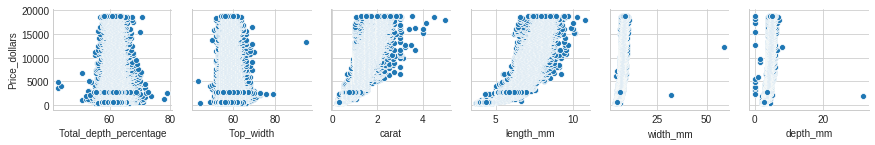

In [103]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['Price_dollars'],
                  x_vars=['Total_depth_percentage','Top_width','carat','length_mm', 'width_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on the above scatterplots between price of diamonds and other quantitative attributes of a diamond. I can deduce the following patterns:


*   Price of a diamond and total depth of a diamond seems to have very vague relationship which is of not much use.
*   Price of a diamond and Top width or table of a diamond also does not show any specific pattern.
*   It can be noticed that weight of the diamond and price of the diamond are almost linear proportional to each other.
*   It also can be noticed that length of a diamond is also have some good pattern with price of the diamond.
*   Width and depth of the diamond though there are some outliers found, I can see that they have slightly linear pattern with price of diamonds.



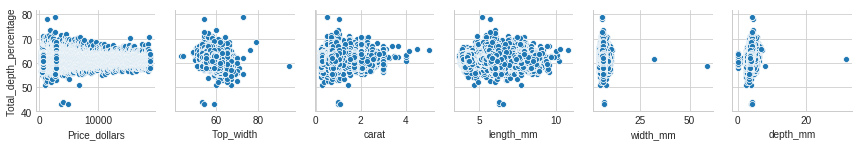

In [104]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['Total_depth_percentage'],
                  x_vars=['Price_dollars','Top_width','carat','length_mm', 'width_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on the above scatterplots between total depth of diamond and rest of the quantitative attributes. I can deduce the following patterns:
*   There is not specific pattern with total depth and price, table (top width), carat and length attributes of diamonds.
*   I can recognize total depth has some relation with width and depth of diamonds excluding few outliers.

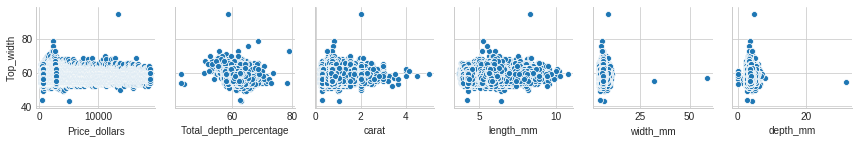

In [105]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['Top_width'],
                  x_vars=['Price_dollars','Total_depth_percentage','carat','length_mm', 'width_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on the above scatterplots between top width (table) of diamond and rest of the quantitative attributes. I can deduce the following patterns:
*   I find no pattern between top width of diamond and price, total depth, carat (weight), length of the diamonds.
*   However, there seems to have a relation between width, depth of diamond and top width of a diamond.

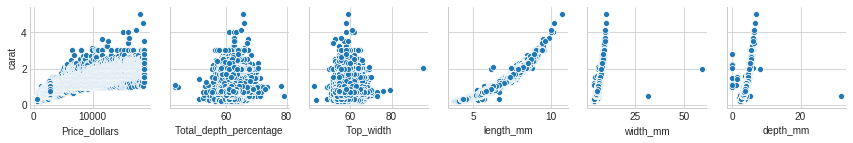

In [106]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['carat'],
                  x_vars=['Price_dollars','Total_depth_percentage','Top_width','length_mm', 'width_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on the above scatterplots between carat ( weight ) of diamond and rest of the quantitative attributes. I can deduce the following patterns:
*   As identified from previous plottings, there is a linear relation ship between price and weight of diamond.
*   There is no specific pattern between carats of diamond and total depth and top width of diamond. They seem to be independent of each other.
*   It can be identified a promising relationship between the weight of diamond and dimensions (length, width and depth) of a diamond


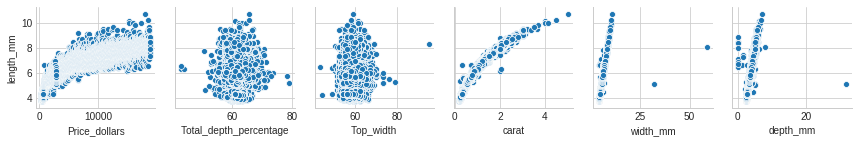

In [107]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['length_mm'],
                  x_vars=['Price_dollars','Total_depth_percentage','Top_width','carat', 'width_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on above plots it can be identified that length of a diamond has an interesting pattern with price, carat, width and depth of a diamond.


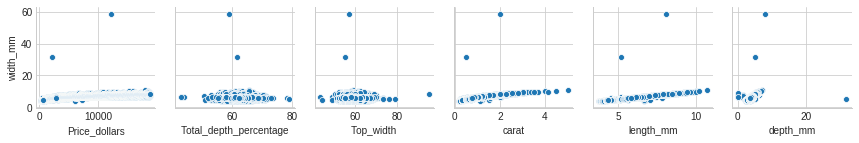

In [108]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['width_mm'],
                  x_vars=['Price_dollars','Total_depth_percentage','Top_width','carat', 'length_mm', 'depth_mm'])
pp.fig.set_size_inches(12,2)

Based on the above plots, it can be identified that width of a diamond has good relation ship with length, weight and price of a diamond. I didnt find any specific pattern with the depth of a diamond.

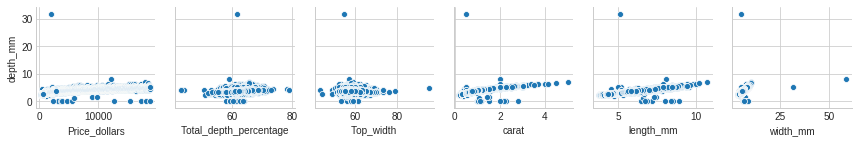

In [109]:
pp = sns.pairplot(data=diamonds,
                  y_vars=['depth_mm'],
                  x_vars=['Price_dollars','Total_depth_percentage','Top_width','carat', 'length_mm', 'width_mm'])
pp.fig.set_size_inches(12,2)

Based on the above plots between depth of a diamond and rest of the quantitative attribtues. It is found that there is a pattern between values of depth of a diamond and price, weight, length and total depth of a diamond.

Finally these are the following observations found by plotting relationships between quantitative attribues of 


*   From the plots between 
*   List item





Barcharts for categorical data with price

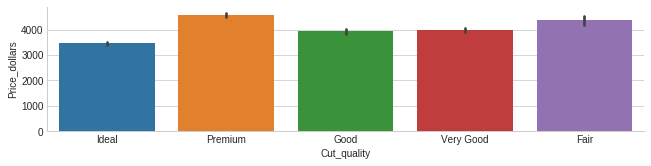

In [129]:
p = sns.catplot(x='Cut_quality', y='Price_dollars', data=diamonds, kind='bar' )
p.fig.set_size_inches(10,2)

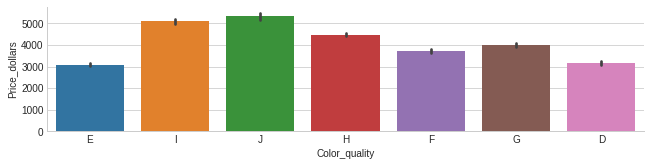

In [133]:
p = sns.catplot(x='Color_quality', y='Price_dollars', data=diamonds, kind='bar')
p.fig.set_size_inches(10,2)

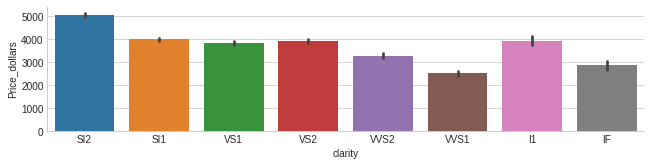

In [134]:
p = sns.catplot(x='clarity', y='Price_dollars', data=diamonds, kind='bar')
p.fig.set_size_inches(10,2)

Histograms

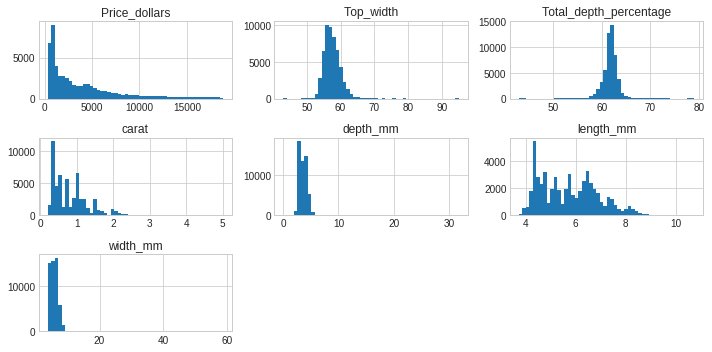

In [148]:
import warnings
warnings.filterwarnings('ignore')

#p =diamonds.hist()
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
diamonds.hist(ax = ax,bins = 50)
plt.tight_layout()